## IMPORT LIBRARIES

In [1]:
!pip install mlflow -q

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("C:/Users/HP/OneDrive/Desktop/data.csv")

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [7]:
data.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [8]:
data.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [9]:
num_columns=data.select_dtypes(include="number").columns

In [10]:
cat_columns=data.select_dtypes(include="object").columns

In [11]:
cat_columns

Index(['Education_Level', 'Occupation', 'Location', 'Marital_Status',
       'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
       'Gender', 'Primary_Mode_of_Transportation'],
      dtype='object')

In [12]:
num_columns

Index(['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size',
       'Income'],
      dtype='object')

## CHECKING OUTLIERS

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

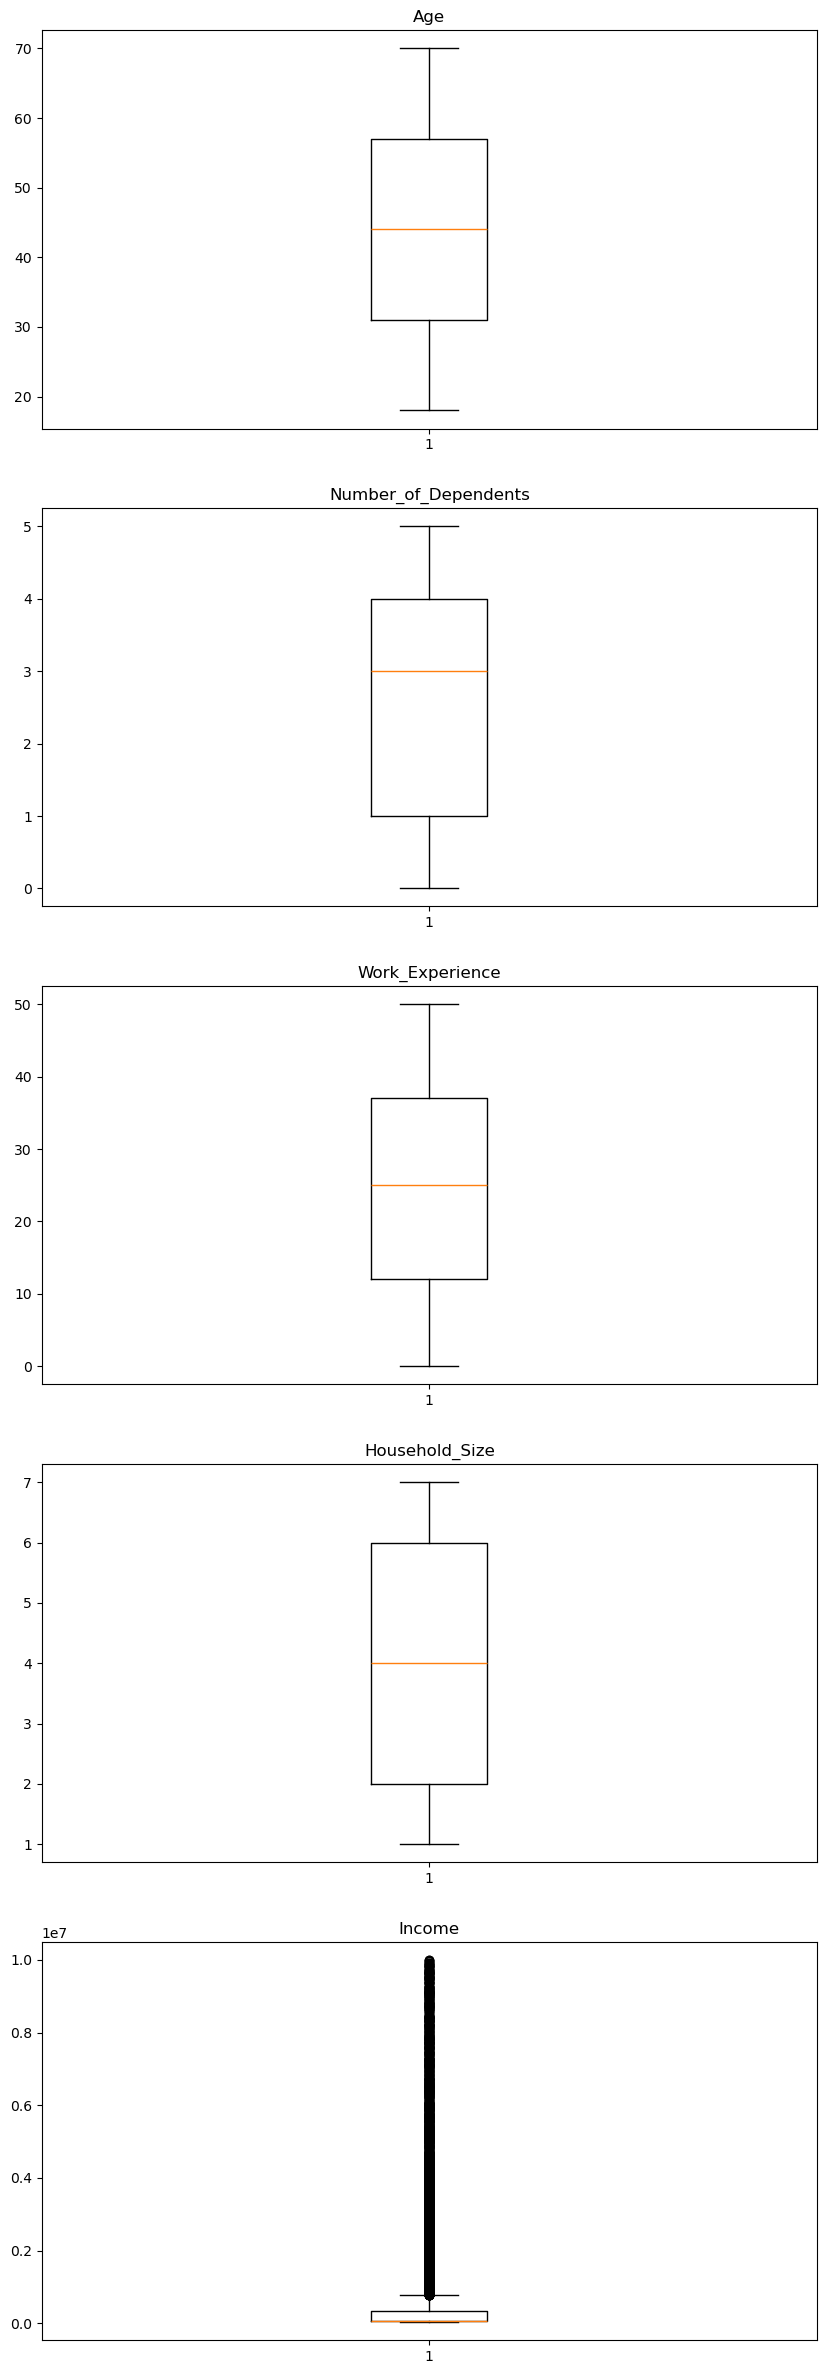

In [14]:
# boxplot for each numerical column.
num_col = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size','Income']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
i=0

for col in num_col:
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i += 1

## ENCODING

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
L_encoder = LabelEncoder()

In [16]:
# encoding categorical data by looping through columns
for i in cat_columns:
    data[i] = L_encoder.fit_transform(data[i])

In [17]:
data.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,3,4,5,2,21,1,0,7,0,0,1,2,72510
1,69,2,1,0,2,4,2,0,7,0,0,1,0,75462
2,46,0,4,1,2,1,2,0,7,0,1,0,1,71748
3,32,2,3,2,2,32,1,0,1,0,0,0,1,74520
4,60,0,1,3,2,15,1,2,4,0,2,1,3,640210


## SCALING

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()

In [20]:
data=ss.fit_transform(data)

In [21]:
data=pd.DataFrame(data)

In [22]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.787878,1.298040,1.342644,1.442904,0.597968,-0.263365,-0.464107,-0.895424,1.497416,-0.813438,-1.068910,0.975695,0.638472,-0.408747
1,1.642959,0.493553,-0.868804,-1.474411,0.597968,-1.423625,1.116639,-0.895424,1.497416,-0.813438,-1.068910,0.975695,-1.548450,-0.407126
2,0.130124,-1.115422,1.342644,-0.890948,0.597968,-1.628377,1.116639,-0.895424,1.497416,-0.813438,0.276816,-1.024910,-0.454989,-0.409166
3,-0.790733,0.493553,0.605494,-0.307485,0.597968,0.487391,-0.464107,-0.895424,-1.487070,-0.813438,-1.068910,-1.024910,-0.454989,-0.407644
4,1.050980,-1.115422,-0.868804,0.275978,0.597968,-0.672869,-0.464107,1.671731,0.005173,-0.813438,1.622542,0.975695,1.731932,-0.096995


In [23]:
data.columns=['Age','Education_Level','Occupation','Number_of_Dependents','Location','Work_Experience','Marital_Status','Employment_Status','Household_Size','Homeownership_Status','Type_of_Housing','Gender','Primary_Mode_of_Transportation','Income']

In [24]:
data.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,0.787878,1.298040,1.342644,1.442904,0.597968,-0.263365,-0.464107,-0.895424,1.497416,-0.813438,-1.068910,0.975695,0.638472,-0.408747
1,1.642959,0.493553,-0.868804,-1.474411,0.597968,-1.423625,1.116639,-0.895424,1.497416,-0.813438,-1.068910,0.975695,-1.548450,-0.407126
2,0.130124,-1.115422,1.342644,-0.890948,0.597968,-1.628377,1.116639,-0.895424,1.497416,-0.813438,0.276816,-1.024910,-0.454989,-0.409166
3,-0.790733,0.493553,0.605494,-0.307485,0.597968,0.487391,-0.464107,-0.895424,-1.487070,-0.813438,-1.068910,-1.024910,-0.454989,-0.407644
4,1.050980,-1.115422,-0.868804,0.275978,0.597968,-0.672869,-0.464107,1.671731,0.005173,-0.813438,1.622542,0.975695,1.731932,-0.096995


## TRAIN TEST SPLIT

In [25]:
# spliting data into train and test data
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop('Income', axis=1)  # Features
y = data['Income']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

## MLFLOW

In [27]:
import mlflow
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']="file:///Users/HP/OneDrive/Documents/Bhuvan/b"

In [28]:
mlflow.set_experiment("housing_data")

<Experiment: artifact_location='file:///C:/Users/HP/OneDrive/Documents/Bhuvan/b/884508345532141847', creation_time=1721219794523, experiment_id='884508345532141847', last_update_time=1721219794523, lifecycle_stage='active', name='housing_data', tags={}>

In [29]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_testing_score", testing_score_rf)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")

    
    

C:\Users\HP\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [30]:
# import requests
# import json
# import pandas as pd


# data = {'dataframe_records': pd.DataFrame(X_test).values.tolist()}
# headers = {"content-Type" : "application/json"}

# response = requests.post("http://localhost:8003/invocations",data=json.dumps(data),headers=headers)
# predictions = response.json()

# print(predictions)